Importing The required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the required dataset

In [2]:
df=pd.read_csv("C:\\Users\\23ady\\Downloads\\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Target Variable

In [41]:
df['isFraud']

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

The target variable has only two types of data i.e 0 and 1 which means it is a problem of binary classification

In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3306874,252,CASH_OUT,153610.60,C2009813251,0.00,0.00,C1332024685,9247297.59,9400908.19,0,0
790722,40,CASH_IN,13146.90,C722069279,13599896.96,13613043.86,C1433166426,2622214.30,2609067.40,0,0
3000532,232,PAYMENT,6846.00,C453178289,23888.00,17042.00,M971733089,0.00,0.00,0,0
3205325,249,CASH_OUT,39962.79,C108737458,0.00,0.00,C30418031,58322.86,98285.65,0,0
5595653,394,PAYMENT,11415.38,C1987928386,0.00,0.00,M1676417057,0.00,0.00,0,0
4851588,347,TRANSFER,7219329.94,C1064333472,0.00,0.00,C1657769946,20944967.52,28164297.46,0,0
2769496,213,PAYMENT,1243.79,C1316826046,54340.00,53096.21,M273188791,0.00,0.00,0,0
3106500,235,CASH_OUT,23338.52,C1880412095,0.00,0.00,C1590707523,1101935.81,1125274.33,0,0
3846875,282,CASH_IN,56358.90,C1580782235,8058546.41,8114905.32,C1771347092,1930160.58,1873801.68,0,0
6146820,546,CASH_OUT,70884.98,C1643609249,0.00,0.00,C1181136117,260144.52,331029.50,0,0


In [6]:
df.shape

(6362620, 11)

The dataset hash 6362620 rows and 11 columns. Its a large dataset

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [9]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

The dataset has int64, object and float64 type of data

In [10]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Key Observations

The dataset has no null values present in it

In [12]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Key Observations

The dataset has no nan values present in it

<AxesSubplot:>

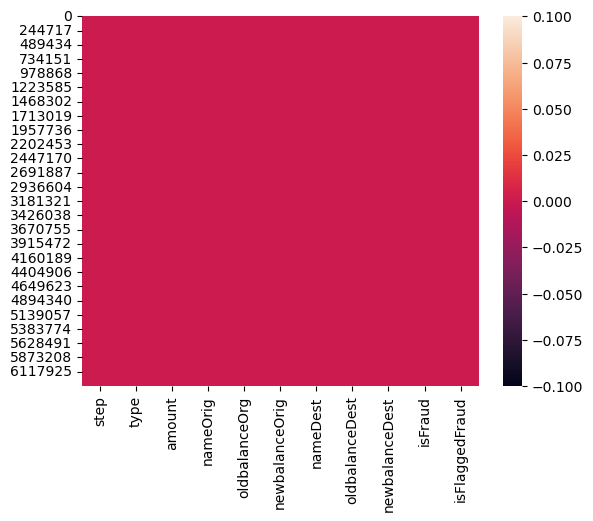

In [13]:
sns.heatmap(df.isnull())

<AxesSubplot:>

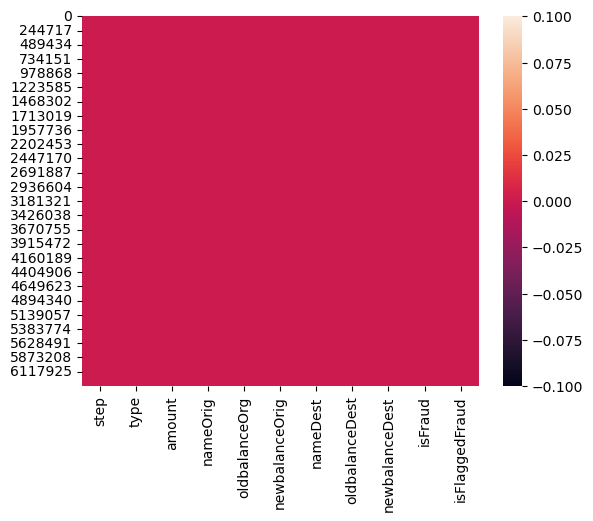

In [14]:
sns.heatmap(df.isna())

In [ ]:
df['step'].nunique()
df['step'].dtypes

Key Observations

The step column has 743 unique values

In [16]:
df['type'].nunique()

5

Key Observations

The type column has 5 unique values and its of object data type

In [17]:
df['type'].unique().tolist()

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

In [18]:
df['amount'].nunique()

5316900

Key Observations

The amount column has 5316900 unique values and its of float64 data type

In [19]:
df['nameOrig'].nunique()

6353307

Key Observations

The nameOrig column has 6353307 unique values and its of object data type

In [20]:
df['oldbalanceOrg'].nunique()

1845844

Key Observations

The oldbalanceOrg column has 1845844 unique values and its of float64 data type

In [21]:
df['newbalanceOrig'].nunique()

2682586

Key Observations

The newbalanceOrig column has 2682586 unique values and its of float64 data type

In [22]:
df['isFraud'].nunique()

2

Key Observations

The isFraud column has 2 unique values and its of int64 data type

In [23]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [24]:
df['isFlaggedFraud'].nunique()

2

Key Observations

The isFlaggedFraud column has 2 unique values and its of int64 data type

In [25]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [26]:
df['oldbalanceDest'].nunique()

3614697

Key Observations

The oldbalanceDest column has 3614697 unique values and its of float64 data type

In [27]:
df['newbalanceDest'].nunique()

3555499

Key Observations

The newbalanceDest column has 3555499 unique values and its of float64 data type

In [28]:
df['nameDest'].nunique()

2722362

Key Observations

The nameDest column has 2722362 unique values and its of object data type

In [29]:
df.nunique().to_frame('No of unique values')

,No of unique values
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


Key Observations

All the unique value counts of each column has been listed in a table

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Key Observations

1. The count of each column is equal which indicates there is no missing or null value present and its a balanced dataset

2. The mean of 'oldbalanceOrg','newbalanceOrig' column is higher than the 50% (median) of that column indicating the columns are right skewed.

3. The mean of 'amount','newbalanceDest' column is lower than the 50% (median) of that column indicating the columns are left skewed.

4. The standard deviation of each column looks good i.e within the range

5. The difference between 75% and max value is not that higher in all the columns but we can check for presence of outliers in our EDA Process

## EXPLORATORY DATA ANALYSIS

#### Univariate Analysis

<AxesSubplot:xlabel='step'>

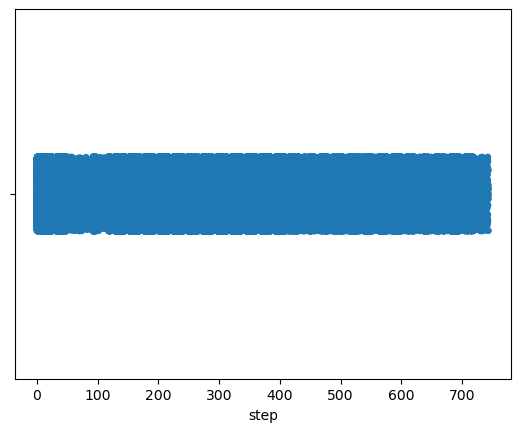

In [31]:
sns.stripplot(df['step'])

<AxesSubplot:xlabel='type', ylabel='Count'>

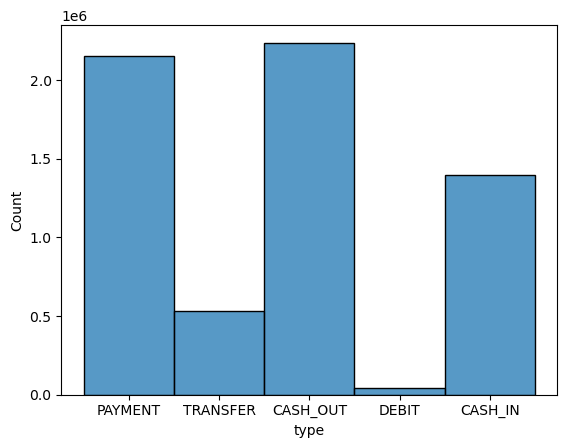

In [32]:
sns.histplot(df['type'])

<AxesSubplot:xlabel='amount'>

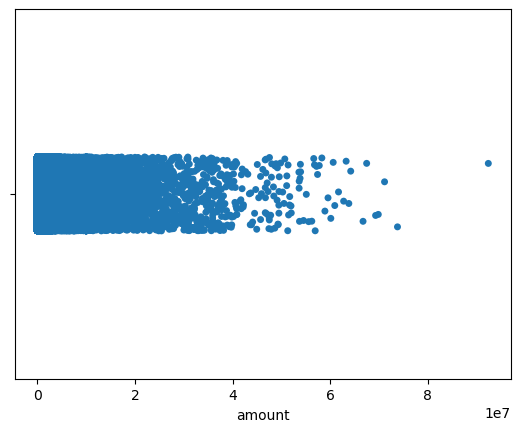

In [33]:
sns.stripplot(df['amount'])

<AxesSubplot:xlabel='oldbalanceOrg'>

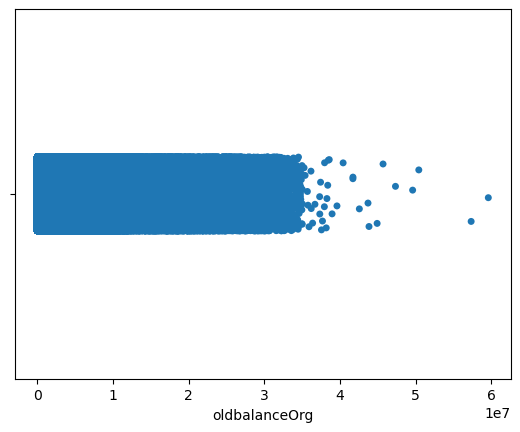

In [34]:
sns.stripplot(df['oldbalanceOrg'])

<AxesSubplot:xlabel='newbalanceOrig'>

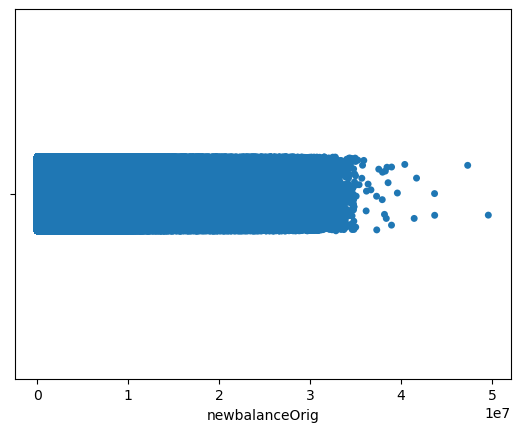

In [35]:
sns.stripplot(df['newbalanceOrig'])

<AxesSubplot:xlabel='oldbalanceDest'>

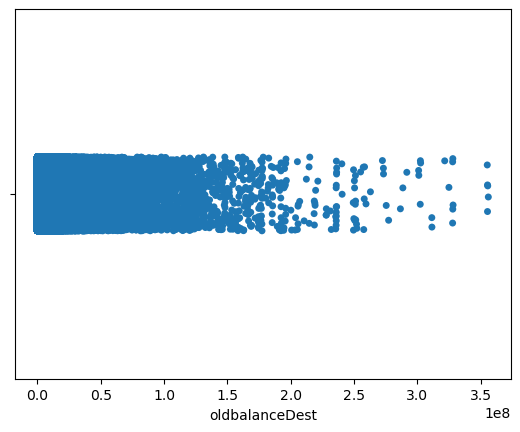

In [63]:
sns.stripplot(df['oldbalanceDest'])

<AxesSubplot:xlabel='newbalanceDest'>

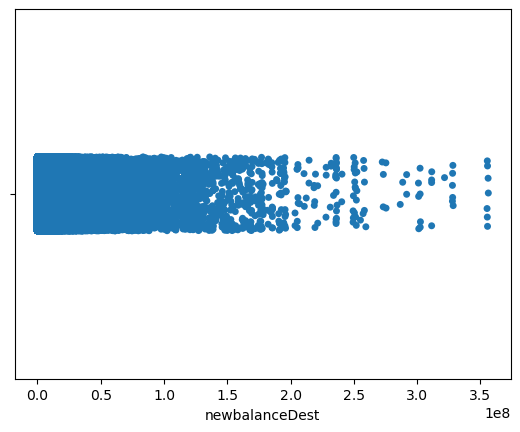

In [62]:
sns.stripplot(df['newbalanceDest'])

<AxesSubplot:xlabel='isFraud', ylabel='count'>

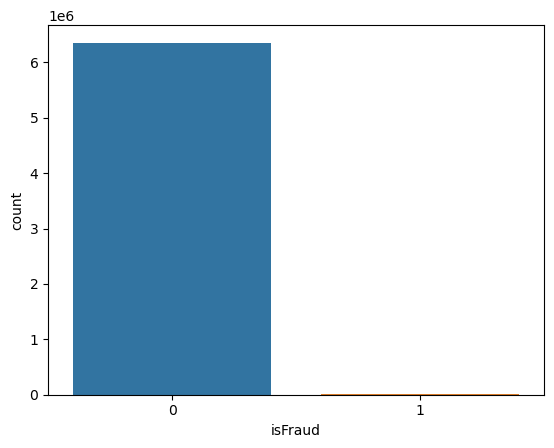

In [60]:
sns.countplot(df['isFraud'])

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

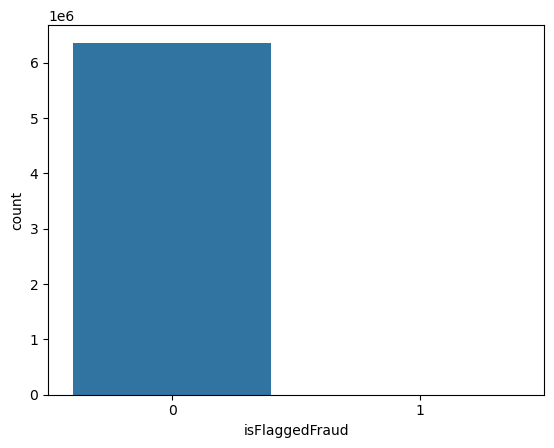

In [61]:
sns.countplot(df['isFlaggedFraud'])

#### Bivariate Analysis

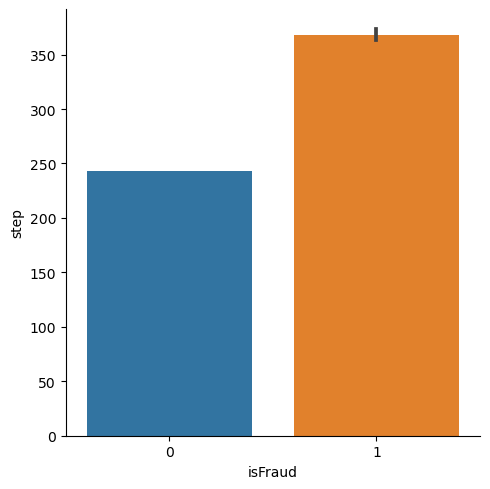

In [71]:
sns.catplot(x='isFraud',y='step',data=df,kind='bar')

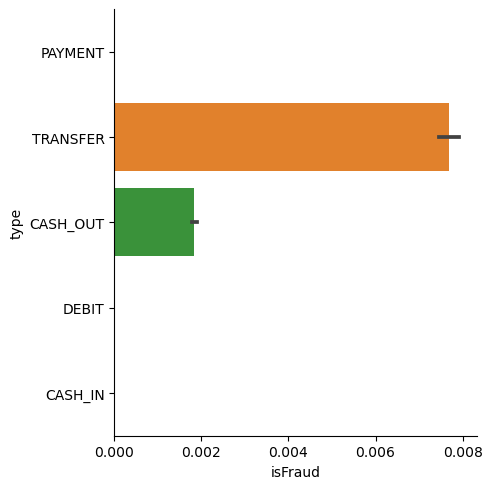

In [72]:
sns.catplot(x='isFraud',y='type',data=df,kind='bar')

Key Observations

From the above analysis we conclude that people who transers money instead of withdrawing cash has a higher chance of being fraud 

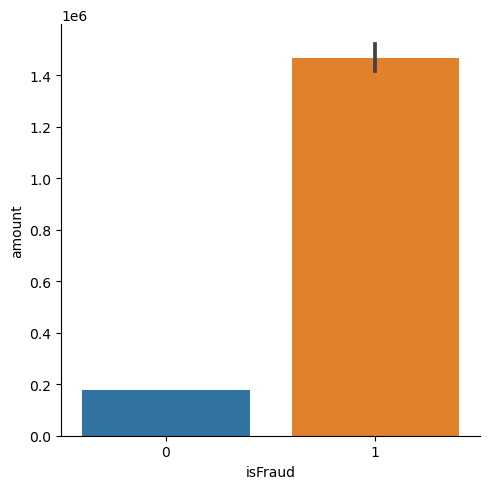

In [73]:
sns.catplot(x='isFraud',y='amount',data=df,kind='bar')

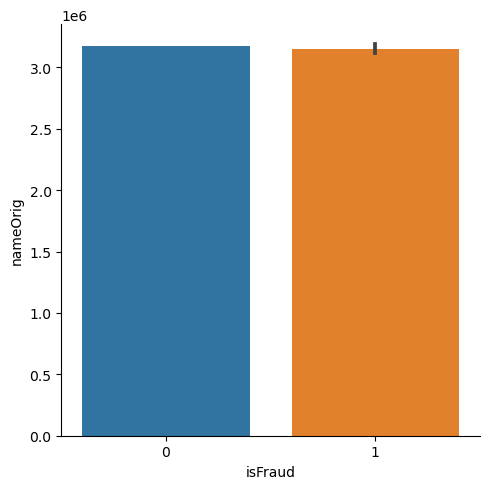

In [64]:
sns.catplot(x='isFraud',y='nameOrig',data=df,kind='bar')

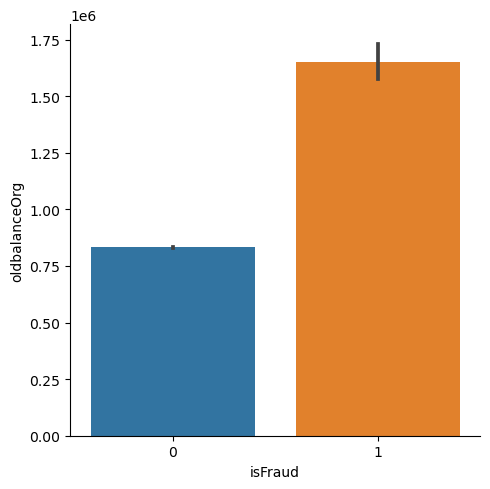

In [65]:
sns.catplot(x='isFraud',y='oldbalanceOrg',data=df,kind='bar')

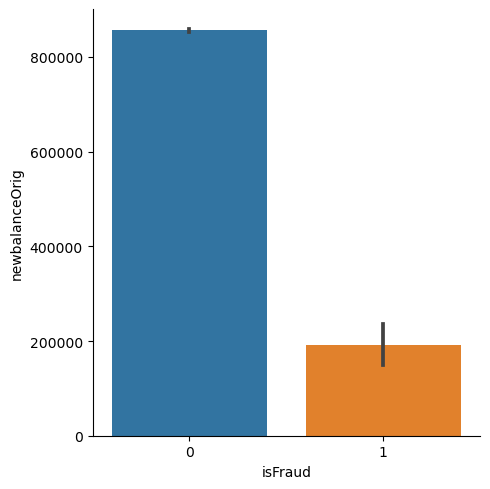

In [5]:
sns.catplot(x='isFraud',y='newbalanceOrig',data=df,kind='bar')

In [ ]:
sns.catplot(x='isFraud',y='oldbalanceDest',data=df,kind='bar')

In [ ]:
sns.catplot(x='isFraud',y='newbalanceDest',data=df,kind='bar')

In [ ]:
sns.catplot(x='isFraud',y='isFlaggedFraud',data=df,kind='bar')

#### Multivariate Analysis

In [ ]:
sns.pairplot(df)
plt.show()

In [8]:
corr=df.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


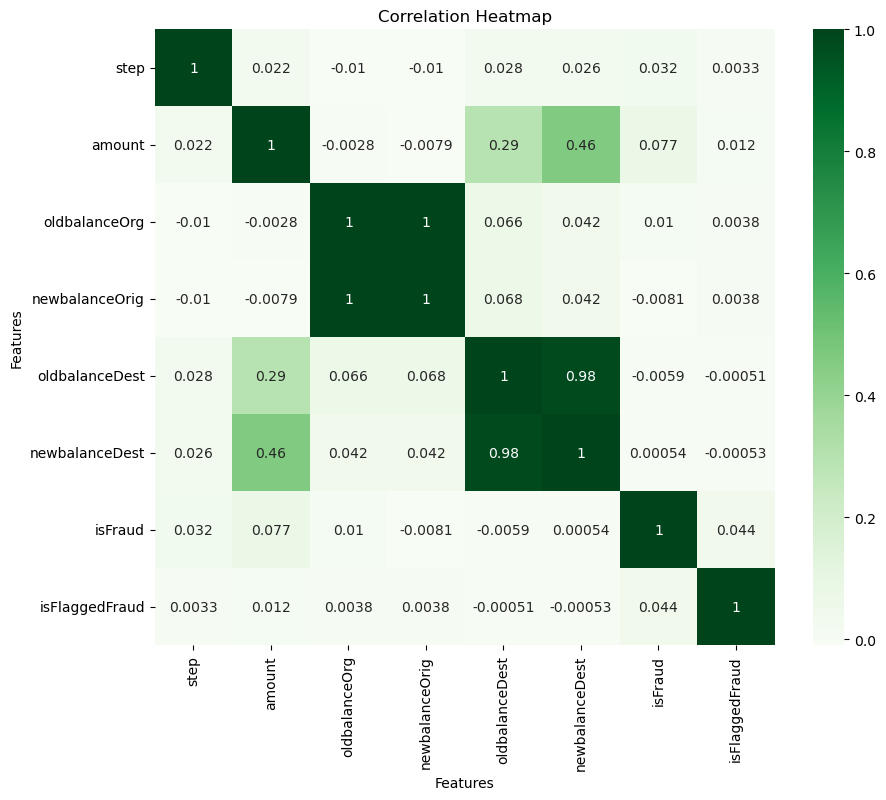

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='Greens',annot=True)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

Key Observations

From the above analysis we observe that 'newbalanceOrig' and 'oldbalanceDest' and oldbalanceDest and newbalanceDest are very highly positively correlated with each other.

'oldbalanceDest','newbalanceDest' are moderately correlating with amount

'newbalanceOrig' and 'oldbalanceDest' are negetively correlated with target variable

Rest of the columns are positively correlated with target variable isFraud


### Plotting Outliers

<Figure size 1200x600 with 0 Axes>

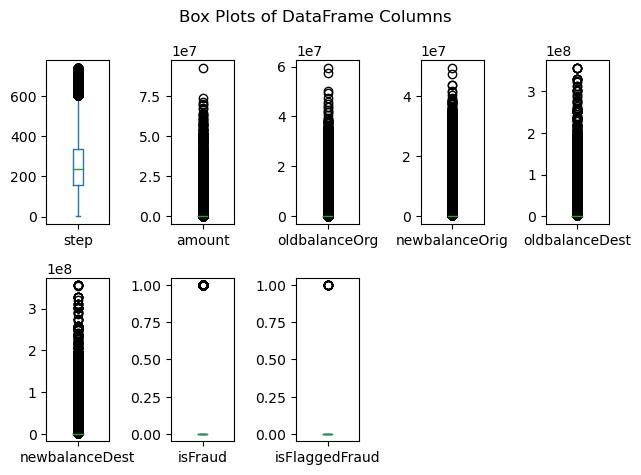

In [3]:
plt.figure(figsize=(12, 6))
df.plot(kind='box',subplots=True,layout=(2, 5))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

Key Observations

We can observe that all the variable except isFraud and isFlaggedFraud variable has outliers present in them.

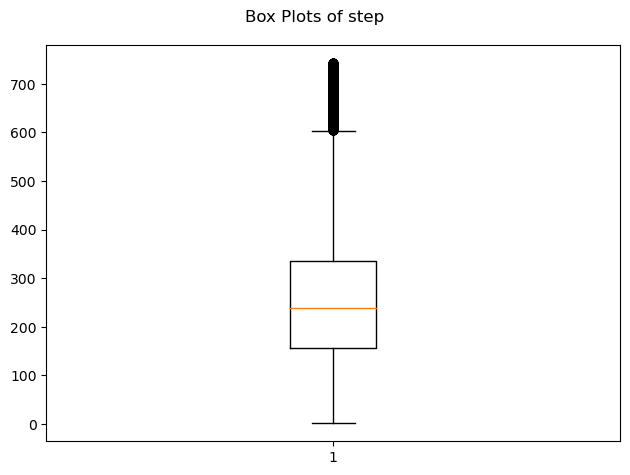

In [4]:
plt.boxplot(df['step'])
plt.suptitle("Box Plots of step")
plt.tight_layout()
plt.show()

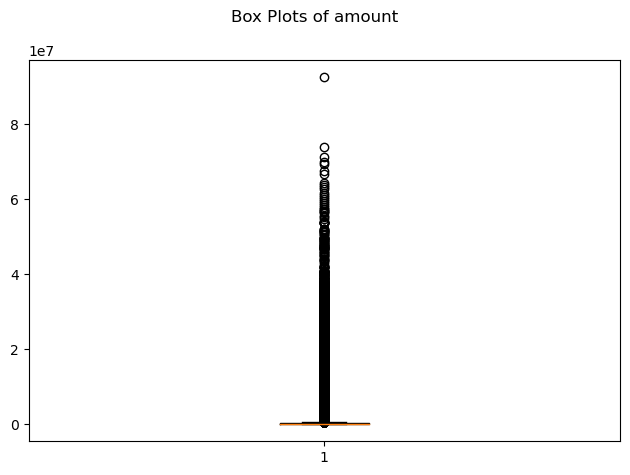

In [5]:
plt.boxplot(df['amount'])
plt.suptitle("Box Plots of amount")
plt.tight_layout()
plt.show()

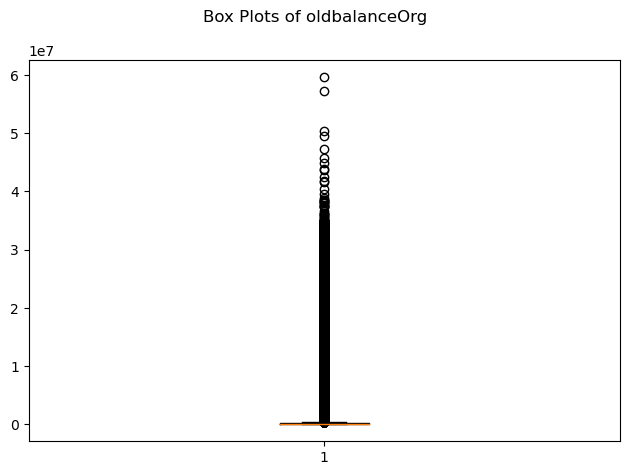

In [6]:
plt.boxplot(df['oldbalanceOrg'])
plt.suptitle("Box Plots of oldbalanceOrg")
plt.tight_layout()
plt.show()

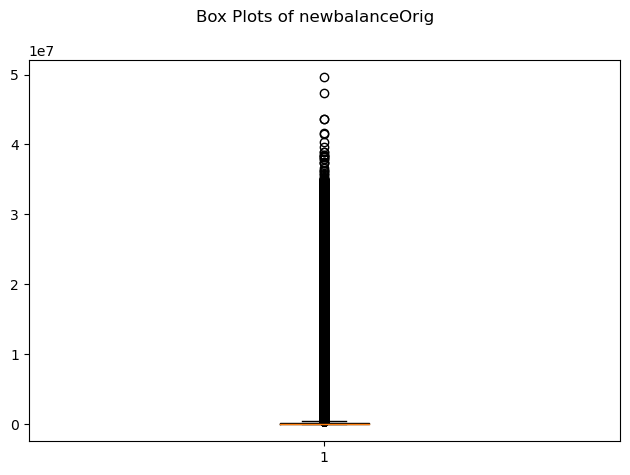

In [7]:
plt.boxplot(df['newbalanceOrig'])
plt.suptitle("Box Plots of newbalanceOrig")
plt.tight_layout()
plt.show()

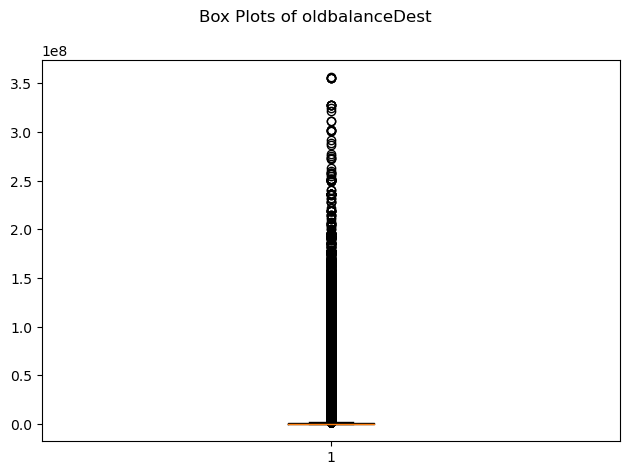

In [8]:
plt.boxplot(df['oldbalanceDest'])
plt.suptitle("Box Plots of oldbalanceDest")
plt.tight_layout()
plt.show()

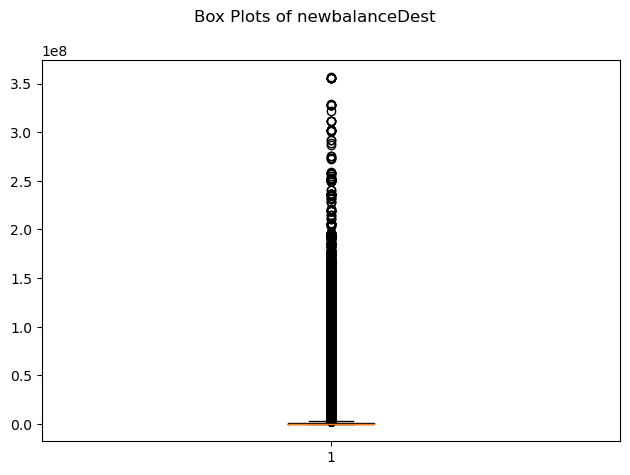

In [9]:
plt.boxplot(df['newbalanceDest'])
plt.suptitle("Box Plots of newbalanceDest")
plt.tight_layout()
plt.show()

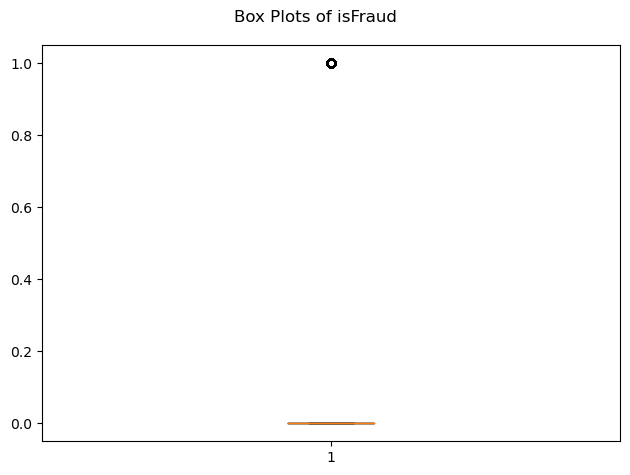

In [10]:
plt.boxplot(df['isFraud'])
plt.suptitle("Box Plots of isFraud")
plt.tight_layout()
plt.show()

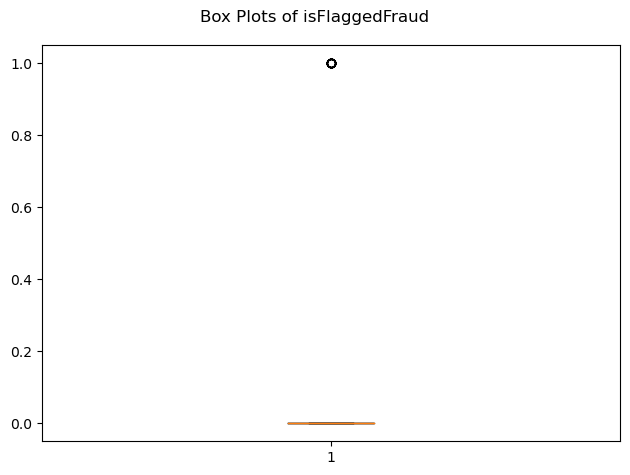

In [11]:
plt.boxplot(df['isFlaggedFraud'])
plt.suptitle("Box Plots of isFlaggedFraud")
plt.tight_layout()
plt.show()

## Data Preprocessing

### Separating Numerical and Categorical Columns

In [12]:
numeric_columns = df.select_dtypes(include=[np.number])

In [13]:
numeric_columns

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [14]:
cat_col=df.select_dtypes(exclude=[np.number])

In [15]:
cat_col

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


### Checking Skewness

In [16]:
df.skew()

step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

Key Observations

all the numerical columns are highly skewed but we wont remove skewness from target variable isFraud

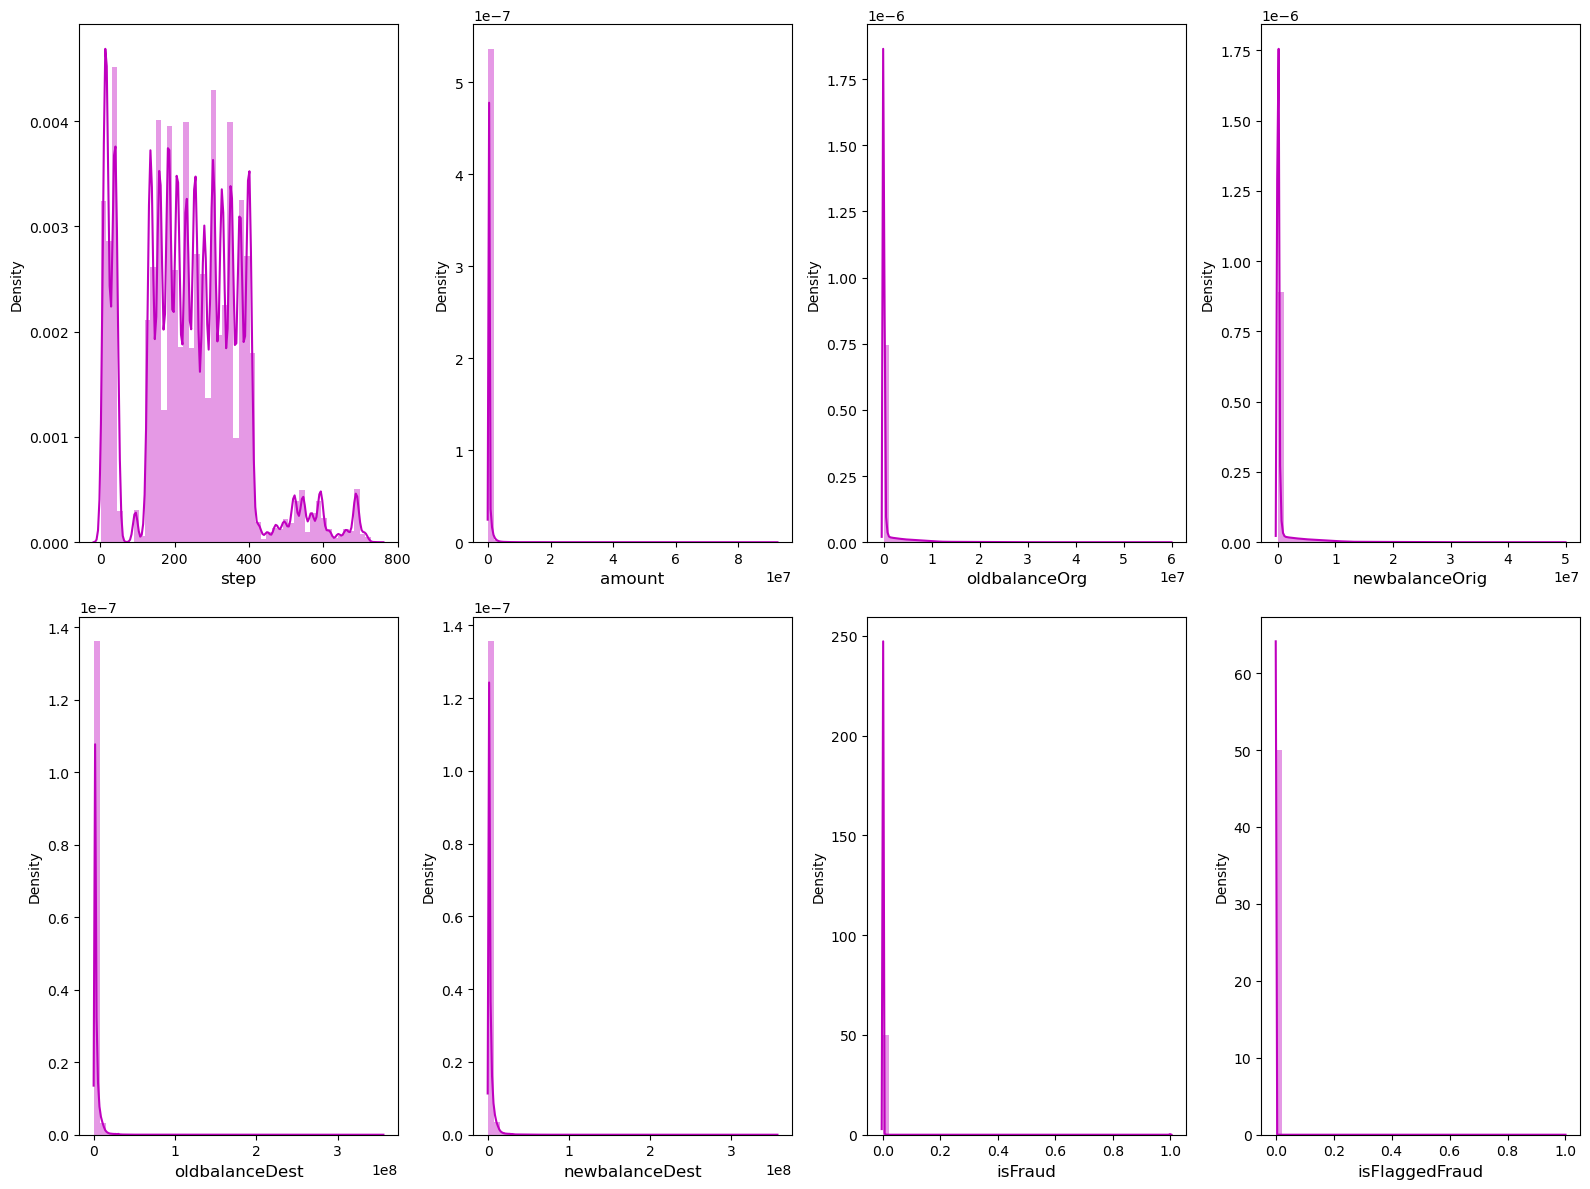

In [52]:
plt.figure(figsize=(16,12))
plotnumber=1
for i in numeric_columns.columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(numeric_columns[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

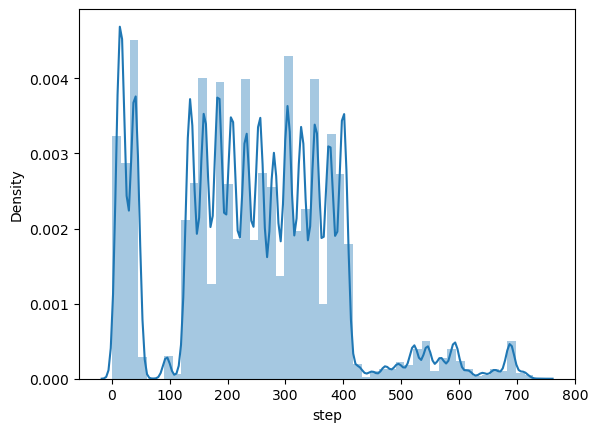

In [53]:
sns.distplot(df['step'])
plt.show()

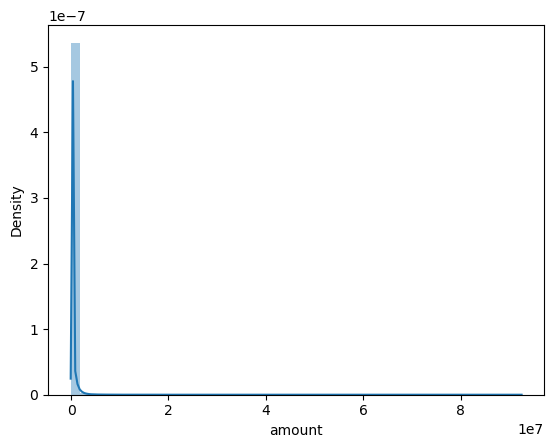

In [56]:
sns.distplot(df['amount'])
plt.show()

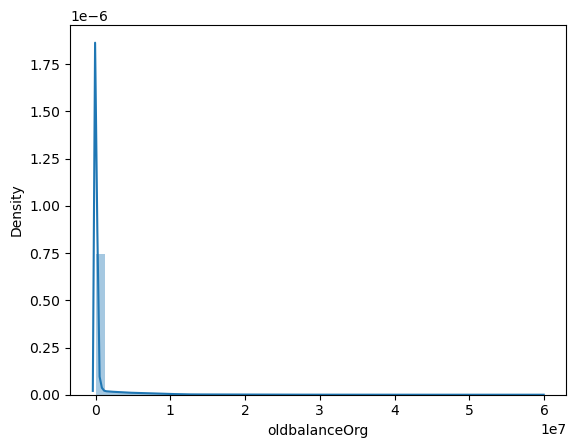

In [57]:
sns.distplot(df['oldbalanceOrg'])
plt.show()

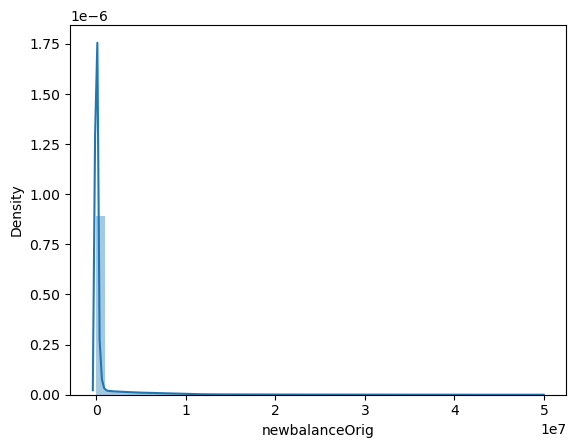

In [59]:
sns.distplot(df['newbalanceOrig'])
plt.show()

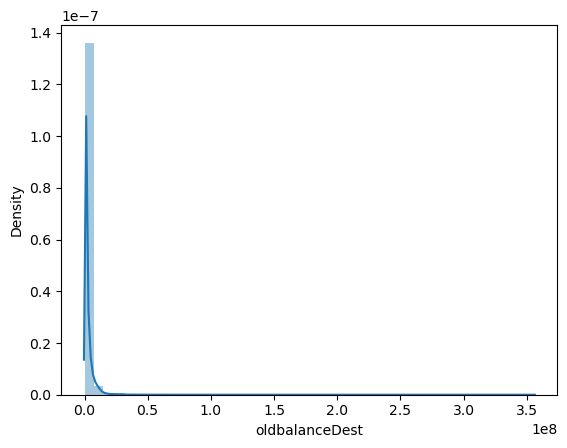

In [62]:
sns.distplot(df['oldbalanceDest'])
plt.show()

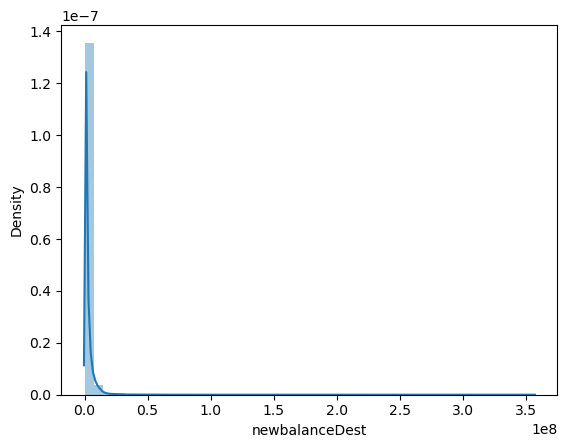

In [63]:
sns.distplot(df['newbalanceDest'])
plt.show()

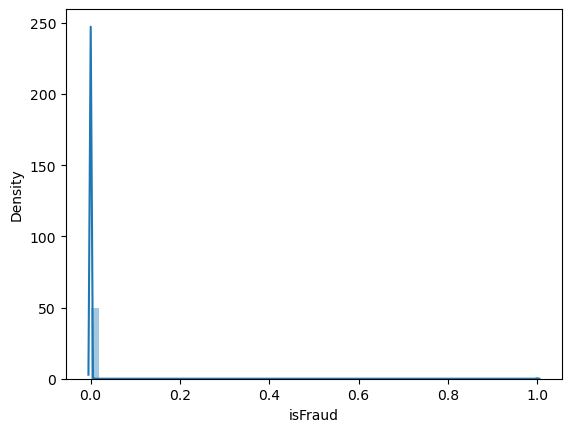

In [65]:
sns.distplot(df['isFraud'])
plt.show()

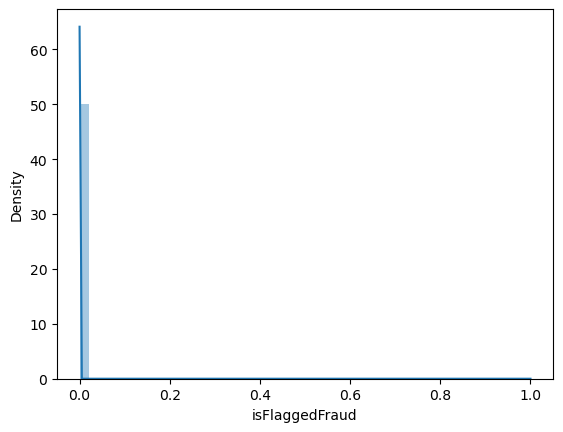

In [68]:
sns.distplot(df['isFlaggedFraud'])
plt.show()

## Separating Lables and Features

In [3]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [4]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0


In [5]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [6]:
x.shape

(6362620, 10)

In [7]:
y.shape

(6362620,)

In [8]:
x.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
dtype: object

In [9]:
y.dtypes

dtype('int64')

In [10]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

We dont remove outliers and skewness from target variable so we 1st separated feateres and labels and then we will proceed with outliers and skewness removal fron feature dataset i.e. X

### Removing Outliers


In [11]:
x.shape

(6362620, 10)

We will remove the outliers using Robust Statistical Measures also known as IQR Method

In [12]:
#removing the outliers by Robust Statistical Measures (IQR method)
Q1 = x.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = x.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers_mask = (x.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (x.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))

In [13]:
df_new=x[~outliers_mask.any(axis=1)]

In [14]:
df_new.shape

(4321893, 10)

Key Observations

Initially the shape of feature dataset was 6362620,10 and after removing the outliers and storing it in a new variable named df_new the shape has become 4321893,10

That means 2040727 rows are removed as outliers

In [15]:
df.skew()

step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

In [16]:
df_new.skew()

step              0.067204
amount            1.386763
oldbalanceOrg     2.294549
newbalanceOrig    2.498367
oldbalanceDest    2.089495
newbalanceDest    1.859608
isFlaggedFraud    0.000000
dtype: float64

we can see that the skewness in the original datas set is due to the presence of outliers and after removal of outliers we can see that the skew ness has segnificantly decreases. so we will balance it.

In [17]:
df_new.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64

In [18]:
df_new.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64

Key Observations

There is no null or nan values present

In [19]:
skewed_features = ['amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest']

Key Observations

we stored the skewed columns in a varibale called skewed features

In [20]:
from scipy.stats import skew,boxcox
from scipy import stats
for feature in skewed_features:
    skewness = skew(df_new[feature])
    print(f"Skewness of {feature}: {skewness}")

Skewness of amount: 1.38676250197754
Skewness of oldbalanceOrg: 2.2945482361721847
Skewness of newbalanceOrig: 2.4983658214676234
Skewness of oldbalanceDest: 2.089494757540816
Skewness of newbalanceDest: 1.8596075273867836


In [21]:
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('Original skewness was: ',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [22]:
df_new['newbalanceOrig'] = np.sqrt(df_new['newbalanceOrig'])

In [23]:
df_new['amount'] = np.cbrt(df_new['amount'])

In [24]:
df_new['oldbalanceOrg'] = np.cbrt(df_new['oldbalanceOrg'])

In [25]:
df_new['oldbalanceDest'] = np.cbrt(df_new['oldbalanceDest'])

In [26]:
df_new['newbalanceDest'] = np.cbrt(df_new['newbalanceDest'])

we used square root and cube root method to remove skewness from all the skewed features

In [27]:
df_new.skew()

step              0.067204
amount            0.359728
oldbalanceOrg     0.532028
newbalanceOrig    1.562905
oldbalanceDest    0.750368
newbalanceDest    0.501836
isFlaggedFraud    0.000000
dtype: float64

<Figure size 1200x600 with 0 Axes>

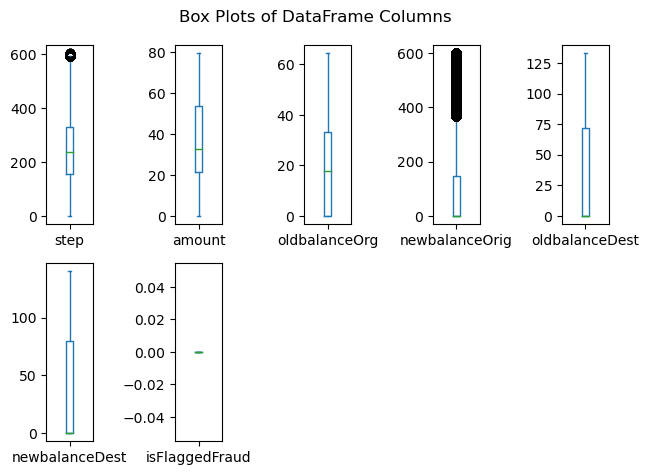

In [28]:
plt.figure(figsize=(12, 6))
df_new.plot(kind='box',subplots=True,layout=(2, 5))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

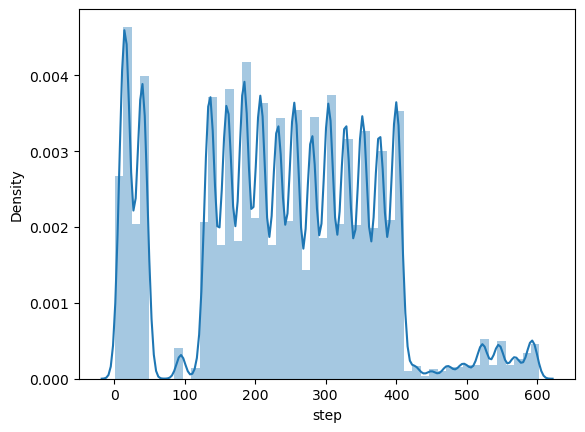

In [29]:
sns.distplot(df_new['step'])
plt.show()

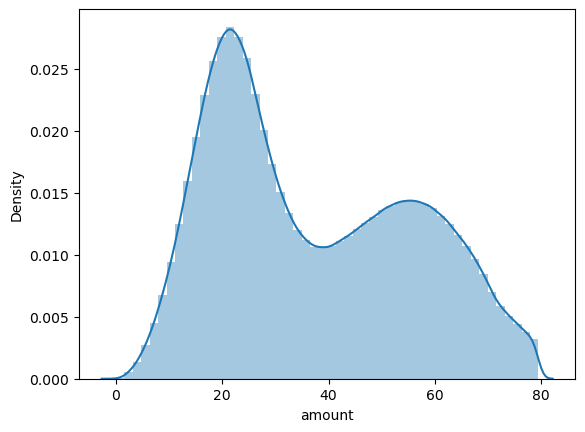

In [30]:
sns.distplot(df_new['amount'])
plt.show()

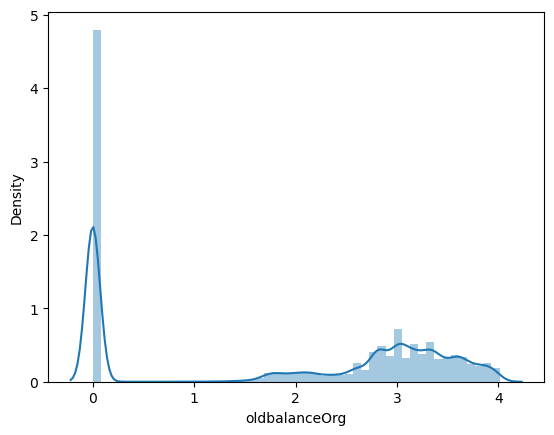

In [58]:
sns.distplot(df_new['oldbalanceOrg'])
plt.show()

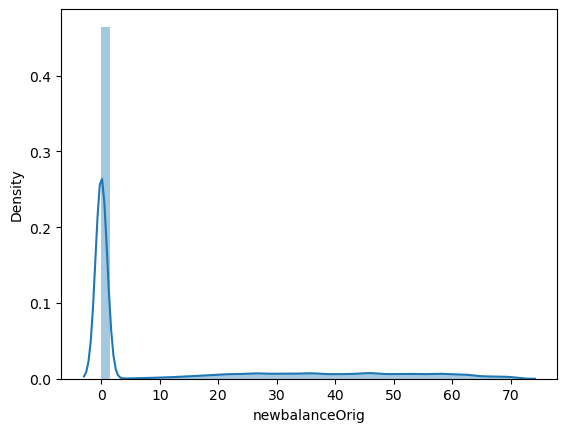

In [60]:
sns.distplot(df_new['newbalanceOrig'])
plt.show()

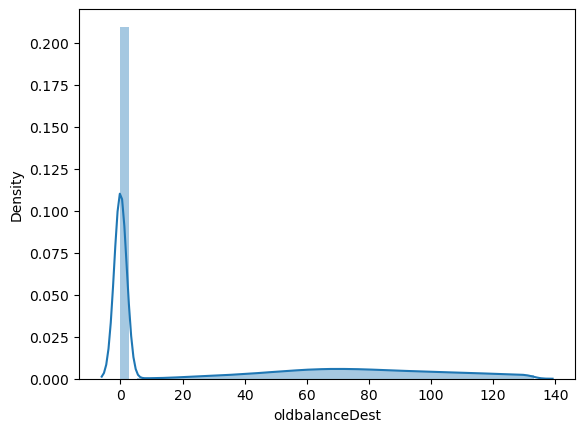

In [61]:
sns.distplot(df_new['oldbalanceDest'])
plt.show()

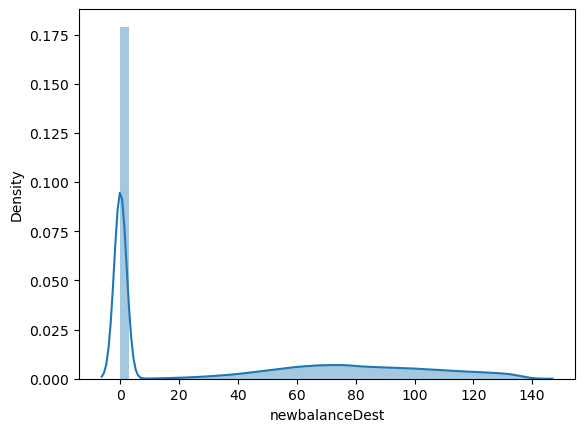

In [64]:
sns.distplot(df_new['newbalanceDest'])
plt.show()

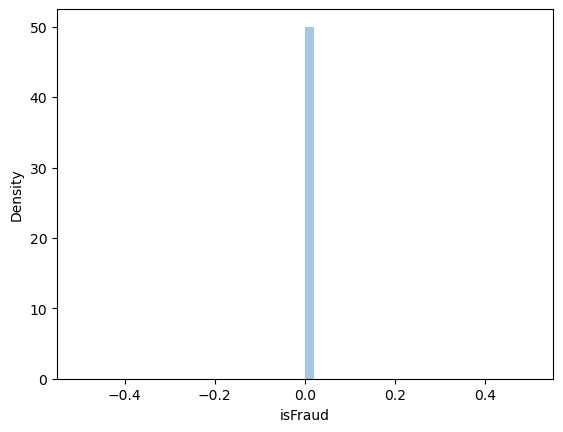

In [66]:
sns.distplot(df_new['isFraud'])
plt.show()

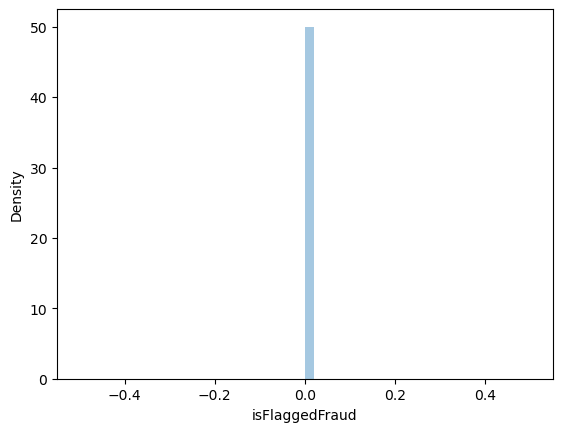

In [67]:
sns.distplot(df_new['isFlaggedFraud'])
plt.show()

Key Observations

After removing outliers and skewness the dataset looks clean and good.

## Encoding Categorical Columns

In [31]:
from sklearn.preprocessing import LabelEncoder
df_new.select_dtypes(include=['object']).columns
label_encoders = {}
for col in df_new:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le

In [32]:
df_new.dtypes

step              int64
type              int32
amount            int64
nameOrig          int32
oldbalanceOrg     int64
newbalanceOrig    int64
nameDest          int32
oldbalanceDest    int64
newbalanceDest    int64
isFlaggedFraud    int64
dtype: object

In [33]:
# Convert numerical columns to a more memory-efficient data type
df_new['step'] = df_new['step'].astype('uint8')  # Adjust the data type as needed

In [34]:
df_new['amount'] = df_new['amount'].astype('uint8')

In [35]:
df_new['oldbalanceOrg'] = df_new['oldbalanceOrg'].astype('uint8')

In [36]:
df_new['newbalanceOrig'] = df_new['newbalanceOrig'].astype('uint8')

In [37]:
df_new['oldbalanceDest'] = df_new['oldbalanceDest'].astype('uint8')

In [38]:
df_new['newbalanceDest'] = df_new['newbalanceDest'].astype('uint8')

In [39]:
df_new['isFlaggedFraud'] = df_new['isFlaggedFraud'].astype('uint8')

In [40]:
df_new.dtypes

step              uint8
type              int32
amount            uint8
nameOrig          int32
oldbalanceOrg     uint8
newbalanceOrig    uint8
nameDest          int32
oldbalanceDest    uint8
newbalanceDest    uint8
isFlaggedFraud    uint8
dtype: object

In [41]:
df_new.shape

(4321893, 10)

In [42]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Key Observations

There is a significant difference between feature df_new and lebel y. It is due to the removal of outliers from feature datatset and not target so we will removee the rows from target that are not present in feature

In [43]:
y=y[:len(df_new)]

In [44]:
y.value_counts()

0    4318420
1       3473
Name: isFraud, dtype: int64

Key Observations

So now we can see that the feature and traget has equal shape.

## Oversampling

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=43)
X_resampled, y_resampled = smote.fit_resample(df_new, y)

In [53]:
X_resampled.value_counts()

step  type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud
116   1     72      3632974   29             32              178050    200             177             0                 5
83    1     89      1501825   145            79              166296    0               111             0                 5
120   1     84      1501913   169            30              166381    0               140             0                 5
90    1     64      3632987   59             65              178024    154             189             0                 5
96    1     66      3632984   52             58              178030    164             186             0                 5
                                                                                                                        ..
79    3     154     3375534   85             129             2249506   0               0               0                 1
                    3

In [54]:
y_resampled.value_counts()

0    4318420
1    4318420
Name: isFraud, dtype: int64

Key Observations

We use oversampling to balance the imbalance class in the y dataset which is our lebel dataset

### Spliting the data for training and testing

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=43)

In [56]:
x_train.shape

(6045788, 10)

In [57]:
x_test.shape

(2591052, 10)

In [58]:
y_train.shape

(6045788,)

In [59]:
y_test.shape

(2591052,)

## Feature Scalling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
# Fit the scaler to the training data
scaler.fit(x_train)

StandardScaler()

In [62]:
# Transform the training and testing data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Key Observations

We performed feature scaling and used standard scaler to scale the x_train x_test data.

### Checking for Multicolinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(df_new.values,i) for i in range (len(df_new.columns))]
vif['Features']=df_new.columns
vif

,VIF Values,Features
0,-1.115986e-02,step
1,5.956886e+00,type
2,-2.206131e-02,amount
3,1.833986e-10,nameOrig
4,6.695673e-02,oldbalanceOrg
5,8.439287e-02,newbalanceOrig
6,-1.852032e-09,nameDest
7,-7.522640e-02,oldbalanceDest
8,-3.244440e-02,newbalanceDest
9,NaN,isFlaggedFraud


 The VIF values above 10 indicate high multicollinearity and now our columns look good as none of them crossed 10, but theh isflagged column showing NaN value which suggests a perfect or near-perfect correlation with other features.

But we wont drop the column as its important to out dataset

## Model Building

### Finding the best random state

Since it a large dataset iterating millions of datas in a loop will take forever to give a result so i took fixed random state 42, to get the best accuracy

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


x_train,x_test,y_train,y_test=train_test_split(df_new,y,test_size=0.30,random_state=42)
RFR=RandomForestClassifier()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=accuracy_score(y_test,pred)

print('Best accuracy is',acc)

Best accuracy is 0.9992541848942748


Key Observations

We got the best accuracy of 99% at random state 42

In [55]:
df_new.shape

(4321893, 10)

In [56]:
y.shape

(4321893,)

Importing all the algorithms we are going to use to build the model

In [64]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
et=ExtraTreesClassifier()
gb=GradientBoostingClassifier()
add=AdaBoostClassifier()
bc=BaggingClassifier()
lr=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [62]:
print('Accuracy score, Confusion Matrix and Classification report for different Models')
print('\n')
models=[et,gb,add,bc,lr,gnb,knn,dtc,rf]
best_accuracy=0
best_model=None
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(df_new,y,test_size=0.30,random_state=42)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    
    
    #Evaluate the model
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('Confusion Matrix of',m)
    print(confusion_matrix(y_test,pred))
    print('Classification Report of',m)
    print(classification_report(y_test,pred))
    print('\n')
    
    if accuracy>best_accuracy:
        best_model=m
        best_accuracy=accuracy
        best_pred=pred
        
print('\nBest Performing Model:',best_model)
print('Accuracy Score:',round(best_accuracy,3))

Accuracy score, Confusion Matrix and Classification report for different Models


Accuracy score of ExtraTreesClassifier()
0.999
Confusion Matrix of ExtraTreesClassifier()
[[1295600       1]
 [    967       0]]
Classification Report of ExtraTreesClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1295601
           1       0.00      0.00      0.00       967

    accuracy                           1.00   1296568
   macro avg       0.50      0.50      0.50   1296568
weighted avg       1.00      1.00      1.00   1296568



Accuracy score of GradientBoostingClassifier()
0.999
Confusion Matrix of GradientBoostingClassifier()
[[1295574      27]
 [    967       0]]
Classification Report of GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1295601
           1       0.00      0.00      0.00       967

    accuracy                           1.00   1296568

Key Observations

ExtraTreesClassifier:

Accuracy score: 0.999
Confusion Matrix: [[1295600 1] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

GradientBoostingClassifier:

Accuracy score: 0.999
Confusion Matrix: [[1295574 27] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

AdaBoostClassifier:

Accuracy score: 0.999
Confusion Matrix: [[1295601 0] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

BaggingClassifier:

Accuracy score: 0.999
Confusion Matrix: [[1295582 19] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

LogisticRegression:

Accuracy score: 0.999
Confusion Matrix: [[1295601 0] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

GaussianNB:

Accuracy score: 0.999
Confusion Matrix: [[1295601 0] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

KNeighborsClassifier:

Accuracy score: 0.999
Confusion Matrix: [[1295601 0] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

DecisionTreeClassifier:

Accuracy score: 0.998
Confusion Matrix: [[1294342 1259] [953 14]]
Classification Report: Precision, recall, and F1-score for the minority class (class 1) are very low. The model is not able to predict class 1 accurately.

RandomForestClassifier:

Accuracy score: 0.999
Confusion Matrix: [[1295601 0] [967 0]]
Classification Report: Precision, recall, and F1-score are all 0.00 for the minority class (class 1). The model is not able to predict class 1 correctly.

Based on these results, the best performing model is the AdaBoostClassifier with an accuracy score of 0.999. However, it's important to note that the models are not able to predict the minority class (class 1) accurately, as indicated by the low precision, recall, and F1-score for class 1 in all the models. This suggests that the models may not be effectively capturing the patterns and characteristics of the minority class, and further analysis or model improvement may be required to address this issue.

## Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
models=[et,gb,add,bc,lr,gnb,knn,dtc,rf]
for m in models:
    score=cross_val_score(m,df_new,y,cv=5)
    print(m,'Cross Validation score is:')
    print(round(score.mean(),3))
    
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Difference between Accuracy and cross validation score is:',round(accuracy_score(y_test,pred)-score.mean(),3))
    print('\n')

ExtraTreesClassifier() Cross Validation score is:
0.999
Difference between Accuracy and cross validation score is: 0.0


GradientBoostingClassifier() Cross Validation score is:
0.977
Difference between Accuracy and cross validation score is: 0.022


AdaBoostClassifier() Cross Validation score is:
0.999
Difference between Accuracy and cross validation score is: 0.0


BaggingClassifier() Cross Validation score is:
0.933
Difference between Accuracy and cross validation score is: 0.066


LogisticRegression() Cross Validation score is:
0.999
Difference between Accuracy and cross validation score is: 0.0


GaussianNB() Cross Validation score is:
0.999
Difference between Accuracy and cross validation score is: 0.0


KNeighborsClassifier() Cross Validation score is:
0.999
Difference between Accuracy and cross validation score is: 0.0


DecisionTreeClassifier() Cross Validation score is:
0.904
Difference between Accuracy and cross validation score is: 0.094




Key Observations

The highest cross-validation scores are ExtraTreesClassifier(), AdaBoostClassifier(), LogisticRegression(), GaussianNB(), and KNeighborsClassifier(). These models have a cross-validation score of 0.999, indicating strong performance.

On the other hand, GradientBoostingClassifier() and BaggingClassifier() have slightly lower cross-validation scores of 0.977 and 0.933, respectively.

The DecisionTreeClassifier() has the lowest cross-validation score of 0.904, indicating comparatively weaker performance.

The difference between the accuracy score and cross-validation score is used to assess overfitting. In this case, the models with a difference of 0.0 (ExtraTreesClassifier(), AdaBoostClassifier(), LogisticRegression(), GaussianNB(), and KNeighborsClassifier()) are less likely to be overfitting the training data, as their accuracy on unseen data is consistent with the cross-validation performance.

So we will proceed with ExtraTree Classifier as The best performing model.
#### ExtraTree Classifier is our best model

## Hyper Parameter Tuning

In [66]:
# ExtraTree Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [67]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth= 20,n_estimators=300,n_jobs=-2,random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

## Plotting ROC and compare AUC for all the models used

In [69]:
#Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(et,x_test,y_test)
plot_roc_curve(et,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(add,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\23ady\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [70]:
a =np.array(y_test)
predicted=np.array(rf.predict(x_test))
fraud=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
fraud

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [71]:
#Since the Model without Outliers performing best! We will select that DataFrame.
#Saving the Model
import pickle
filename='fraud_detection.pickle'
pickle.dump(et,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

NotFittedError: This ExtraTreesClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.